In [13]:
import cv2
import glob
import io
import matplotlib.pyplot as plt
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [14]:
class EigenfacesDataset(Dataset):

    def __init__(self, data_dir, label='head_position', scale=1, transform=None):
        """
        Arguments:
            data_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.img_path_list = [
            i for i in sorted(glob.glob("{}/**/*.pgm".format(data_dir))) \
            if self.get_labels(i)['scale'] == scale]
        self.label = label
        self.classes = self.get_classes(label)
        self.num_classes = len(self.classes)
        self.transform = transform

    def __len__(self):
        return len(self.img_path_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.img_path_list[idx]
        image = cv2.imread(img_path, -1)
        if self.transform:
            image = torch.squeeze(self.transform(image))

        labels = self.get_labels(img_path)
        label_idx = self.classes.index(labels[self.label])

        return image, label_idx

    def get_classes(self, label):
        if label == 'user_id':
            return ['an2i', 'at33', 'boland', 'bpm', 'ch4f',
                    'cheyer', 'choon', 'danieln', 'glickman',
                    'karyadi', 'kawamura', 'kk49', 'megak',
                    'mitchell', 'night', 'phoebe', 'saavik',
                    'steffi', 'sz24', 'tammo']
        if label == 'head_position':
            return ['straight', 'left', 'right', 'up']
        if label == 'facial_expression':
            return ['neutral', 'happy', 'sad', 'angry']
        if label == 'eye_state':
            return ['open', 'sunglasses']
        raise Exception('Invalid label')

    def get_labels(self, img_path):
        img_name = os.path.splitext(os.path.basename(img_path))[0]
        img_name_split = img_name.split('_')

        user_id = img_name_split[0]
        head_position = img_name_split[1]
        facial_expression = img_name_split[2]
        eye_state = img_name_split[3]

        if len(img_name_split) == 5:
            scale = int(img_name_split[4])
        else:
            scale = 1
        
        labels = {
            'user_id': user_id,
            'head_position': head_position,
            'facial_expression': facial_expression,
            'eye_state': eye_state,
            'scale': scale}
        return labels

In [15]:
normalize_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])
eigenfaces_dataset = EigenfacesDataset(data_dir='../data', transform=normalize_transform)
eigenfaces_dataloader = DataLoader(eigenfaces_dataset)

torch.Size([120, 128])


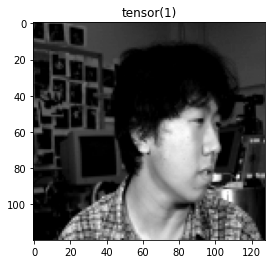

In [16]:
for images, labels in eigenfaces_dataloader:
    print(images[0].shape)
    plt.title(labels[0])
    plt.imshow(images[0], cmap='gray')
    break